In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, Lasso, LassoCV, lars_path
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import scipy.stats as stats
from sklearn.model_selection import KFold
%matplotlib inline

In [4]:
with open('rookies_totals.pickle', 'rb') as to_read:
    totals = pickle.load(to_read)

with open('rookies_games.pickle', 'rb') as to_read:
    games = pickle.load(to_read)
    
with open('rookies_minutes.pickle', 'rb') as to_read:
    minutes = pickle.load(to_read)

In [8]:
totals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 258
Data columns (total 59 columns):
PLAYER              259 non-null object
FIRST_YEAR          259 non-null int64
EFG_PCT             259 non-null float64
FG2_PCT             259 non-null float64
FG3_PCT             259 non-null float64
FG_PCT              259 non-null float64
FT_PCT              259 non-null float64
DRAFT_YEAR          259 non-null int64
ROUND               259 non-null int64
PICK_OVERALL        259 non-null int64
DRAFT_TEAM          259 non-null object
AGE                 259 non-null float64
POS                 259 non-null object
BIRTH_COUNTRY       259 non-null object
COLLEGE             259 non-null object
FIFTH_YEAR          259 non-null int64
RK                  259 non-null object
TEAM                259 non-null object
SALARY              259 non-null int64
AST                 259 non-null int64
BLK                 259 non-null int64
DRB                 259 non-null int64
FG                

In [56]:
num = df[['SALARY','G','GS','MP','FG','FGA','FG_PCT','FG3','FG3A','FG3_PCT','FG2','FG2A','FG2_PCT','EFG_PCT','FT',
        'FTA','FT_PCT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS',
         'DWS',
       'WS', 'OWS', 'PER', 'BLK_PCT', 'VORP', 'TRB_PCT', 'FG3A_PER_FGA_PCT',
       'OBPM', 'WS_PER_48', 'BPM', 'DRB_PCT', 'STL_PCT', 'TOV_PCT', 'TS_PCT',
       'USG_PCT', 'DBPM', 'FTA_PER_FGA_PCT', 'AST_PCT', 'ORB_PCT']]


In [34]:
alphas = [200000, 210000,220000,230000,240000,250000,260000,270000,280000,290000,300000, 400000, 500000]

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    
    X = num.iloc[:,1:]
    y = num.iloc[:,0]
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    kf = KFold(n_splits=5, shuffle=True)
    
    print(alpha, np.mean(cross_val_score(lasso, X, y, cv=kf, scoring='r2')))
    

200000 0.02364245121945836
210000 0.09174852876956563
220000 0.12525381008881187
230000 0.1082618873405097
240000 0.08569403624914751
250000 0.13766253993237637
260000 0.09314011278546461
270000 0.12146595808904515
280000 0.11792706639590092
290000 0.06916101130559202
300000 0.0996747408634417
400000 0.08612219226537225
500000 0.11786574641632712


In [22]:
df.drop([100], axis=0, inplace=True)

KeyError: '[100] not found in axis'

In [6]:
len(df)

258

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 258
Data columns (total 60 columns):
PLAYER              258 non-null object
FIRST_YEAR          258 non-null int64
EFG_PCT             258 non-null float64
FG2_PCT             258 non-null float64
FG3_PCT             258 non-null float64
FG_PCT              258 non-null float64
FT_PCT              258 non-null float64
DRAFT_YEAR          258 non-null int64
ROUND               258 non-null int64
PICK_OVERALL        258 non-null int64
DRAFT_TEAM          258 non-null object
AGE                 258 non-null float64
POS                 258 non-null object
BIRTH_COUNTRY       258 non-null object
COLLEGE             258 non-null object
FIFTH_YEAR          258 non-null int64
RK                  258 non-null object
TEAM                258 non-null object
SALARY              258 non-null int64
AST                 258 non-null int64
BLK                 258 non-null int64
DRB                 258 non-null int64
FG                

In [ ]:
'DWS','WS','OWS',
               'PER','BLK_PCT','VORP','TRB_PCT','FG3A_PER_FGA_PCT','OBPM','WS_PER_48','BPM','DRB_PCT','STL_PCT',
                'TOV_PCT','TS_PCT','USG_PCT','DBPM','FTA_PER_FGA_PCT','AST_PCT','ORB_PCT'

In [35]:
num = df[['SALARY','EFG_PCT','FG2_PCT','FG3_PCT','FG_PCT','FT_PCT','AST','BLK','DRB','FG','FG2','FG2A',
                'FG3','FG3A','FGA','FT','FTA','G','GS','MP','ORB','PF','PTS','STL','TOV','TRB']]

In [37]:
alphas = np.arange(100000, 400000, 100)

X = num.iloc[:,1:]
y = num.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lcv = LassoCV(alphas = alphas, cv=5)
lcv.fit(X_train, y_train)

print(lcv.alpha_)
print(lcv.score(X_test, y_test))
list(zip(X.columns, lcv.coef_))

158000
0.06778743313043922


[('EFG_PCT', 0.0),
 ('FG2_PCT', 0.0),
 ('FG3_PCT', 894733.25585799),
 ('FG_PCT', 0.0),
 ('FT_PCT', -205663.24355942445),
 ('AST', 0.0),
 ('BLK', 1109675.621302008),
 ('DRB', 0.0),
 ('FG', 0.0),
 ('FG2', 0.0),
 ('FG2A', 0.0),
 ('FG3', 0.0),
 ('FG3A', 0.0),
 ('FGA', 0.0),
 ('FT', 0.0),
 ('FTA', 944051.4798931814),
 ('G', -543316.1041813049),
 ('GS', 444514.15633483144),
 ('MP', 0.0),
 ('ORB', 0.0),
 ('PF', -0.0),
 ('PTS', 0.0),
 ('STL', 594167.0989035462),
 ('TOV', 319352.5745987659),
 ('TRB', 0.0)]

In [49]:
num2 = df[['DWS','WS','OWS','PER','BLK_PCT','VORP','TRB_PCT','FG3A_PER_FGA_PCT','OBPM','WS_PER_48','BPM','DRB_PCT',
        'STL_PCT','TOV_PCT','TS_PCT','USG_PCT','DBPM','FTA_PER_FGA_PCT','AST_PCT','ORB_PCT']]

num = num.append(num2)

/Users/Stephen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [60]:
alphas = np.arange(100000, 500000, 1000)

X = num.iloc[:,1:]
y = num.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lcv = LassoCV(alphas = alphas, cv=5)
lcv.fit(X_train, y_train)

print(lcv.alpha_)
print(lcv.score(X_test, y_test))
list(zip(X.columns, lcv.coef_))

379000
0.1322647771897364


[('G', -0.0),
 ('GS', 321856.22773472755),
 ('MP', 0.0),
 ('FG', 0.0),
 ('FGA', 0.0),
 ('FG_PCT', -0.0),
 ('FG3', 0.0),
 ('FG3A', 0.0),
 ('FG3_PCT', 428908.6115657923),
 ('FG2', 0.0),
 ('FG2A', 0.0),
 ('FG2_PCT', 0.0),
 ('EFG_PCT', -0.0),
 ('FT', 0.0),
 ('FTA', 576937.1188448204),
 ('FT_PCT', -0.0),
 ('ORB', 0.0),
 ('DRB', 0.0),
 ('TRB', 0.0),
 ('AST', 0.0),
 ('STL', 0.0),
 ('BLK', 586644.6713050366),
 ('TOV', 601397.1619351386),
 ('PF', 0.0),
 ('PTS', 0.0),
 ('DWS', 0.0),
 ('WS', 0.0),
 ('OWS', 0.0),
 ('PER', 0.0),
 ('BLK_PCT', -0.0),
 ('VORP', 606906.6606578719),
 ('TRB_PCT', 0.0),
 ('FG3A_PER_FGA_PCT', 0.0),
 ('OBPM', 0.0),
 ('WS_PER_48', -0.0),
 ('BPM', 0.0),
 ('DRB_PCT', 0.0),
 ('STL_PCT', 63178.506976918616),
 ('TOV_PCT', 0.0),
 ('TS_PCT', -0.0),
 ('USG_PCT', 0.0),
 ('DBPM', 70476.05799284208),
 ('FTA_PER_FGA_PCT', 0.0),
 ('AST_PCT', 0.0),
 ('ORB_PCT', -0.0)]

In [72]:
new_df = num[['SALARY','GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK']]

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lm = LinearRegression()

print(np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')))
lm.fit(X_train, y_train)
print(lm.score(X_test, y_test))

0.07253003588334221
0.024767652018046316


In [83]:
new_df = num[['SALARY','GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK', 'DRB', 'FG','VORP','STL_PCT','DBPM']]

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

X_train_scaled = scaler.fit_transform(X_train)

alphas, _, coefs = lars_path(X_train_scaled, y_train, method='lasso')

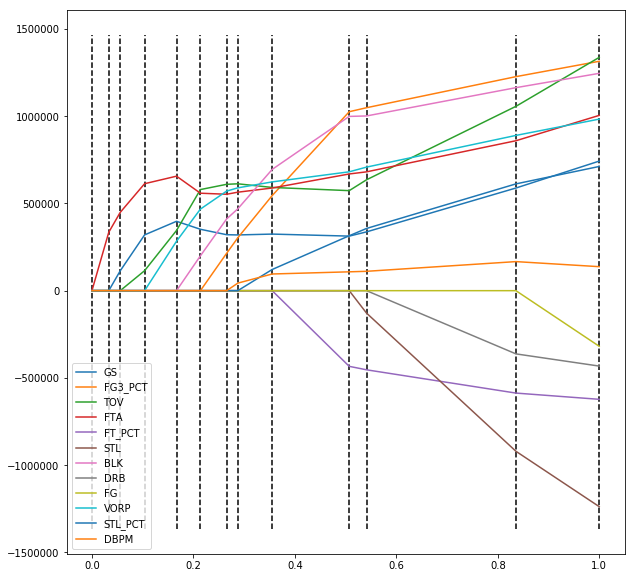

In [84]:
xx = np.sum(np.abs(coefs.T), axis = 1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.axis('tight')

plt.legend(X_train.columns)
plt.show()

In [73]:
new_df = num[['SALARY','GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK', 'DRB', 'FG','VORP','STL_PCT','DBPM']]
features = ['GS','FG3_PCT','TOV','FTA','FT_PCT','STL','BLK','DRB','FG','VORP','STL_PCT','DBPM']

X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

kf = KFold(n_splits=5, shuffle=True, random_state=43)

max_rsquared = 0
keep = []

for feature in features:
    keep.append(feature)
    X = new_df.loc[:,keep]
    rsq = np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2'))
    if rsq > max_rsquared:
        max_rsquared = rsq
    else:
        keep.pop()

print(keep)
print(max_rsquared)

['GS', 'FG3_PCT', 'FTA', 'FT_PCT', 'BLK', 'DRB', 'VORP']
0.17367542837699532


In [74]:
num = df[['SALARY','G','GS','MP','FG','FGA','FG_PCT','FG3','FG3A','FG3_PCT','FG2','FG2A','FG2_PCT','FT','FTA',
            'FT_PCT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS',
         'PER','TS_PCT','FG3A_PER_FGA_PCT','FTA_PER_FGA_PCT','ORB_PCT','DRB_PCT','TRB_PCT','AST_PCT',
            'STL_PCT','BLK_PCT','TOV_PCT','USG_PCT','OWS','DWS','WS','WS_PER_48','OBPM','DBPM','BPM','VORP']]
features = ['G','GS','MP','FG','FGA','FG_PCT','FG3','FG3A','FG3_PCT','FG2','FG2A','FG2_PCT','FT','FTA',
            'FT_PCT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS',
         'PER','TS_PCT','FG3A_PER_FGA_PCT','FTA_PER_FGA_PCT','ORB_PCT','DRB_PCT','TRB_PCT','AST_PCT',
            'STL_PCT','BLK_PCT','TOV_PCT','USG_PCT','OWS','DWS','WS','WS_PER_48','OBPM','DBPM','BPM','VORP']

X = num.iloc[:,1:]
y = num.iloc[:,0]

lm = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=43)

max_rsquared = 0
keep = []

for feature in features:
    keep.append(feature)
    X = num.loc[:,keep]
    rsq = np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2'))
    if rsq > max_rsquared:
        max_rsquared = rsq
    else:
        keep.pop()
        
print(keep)
print(max_rsquared)

['G', 'GS', 'MP', 'FT', 'FT_PCT', 'BLK', 'PF', 'FG3A_PER_FGA_PCT', 'STL_PCT', 'DBPM', 'VORP']
0.15030106432534227


In [28]:
for column in numerical.columns:
    if 0 in numerical[column]:
        print(column)

SALARY
EFG_PCT
FG2_PCT
FG3_PCT
FG_PCT
FT_PCT
AST
BLK
DRB
FG
FG2
FG2A
FG3
FG3A
FGA
FT
FTA
G
GS
MP
ORB
PF
PTS
STL
TOV
TRB
DWS
WS
OWS
PER
BLK_PCT
VORP
TRB_PCT
FG3A_PER_FGA_PCT
OBPM
WS_PER_48
BPM
DRB_PCT
STL_PCT
TOV_PCT
TS_PCT
USG_PCT
DBPM
FTA_PER_FGA_PCT
AST_PCT
ORB_PCT


In [228]:
corrs = numerical[['SALARY','FTA','GS','PTS','FT','TOV','FG','MP','FGA','FG2','FG2A','STL','VORP','DRB','WS']]

In [595]:
numerical['SALARY_LOG'] = [np.log(x) for x in numerical['SALARY']]

/Users/Stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [451]:
numerical.head()

,SALARY,EFG_PCT,FG2_PCT,FG3_PCT,FG_PCT,FT_PCT,AST,BLK,DRB,FG,...,STL_PCT,TOV_PCT,TS_PCT,USG_PCT,DBPM,FTA_PER_FGA_PCT,AST_PCT,ORB_PCT,ROUND_2,SALARY_LOG
0,2016692,0.493,0.491,0.330,0.413,0.857,87,5,43,93,...,1.1,15.1,0.535,21.8,-1.8,0.218,23.5,2.5,0,14.516969
1,21590909,0.478,0.500,0.271,0.447,0.721,33,22,123,93,...,1.3,13.9,0.517,15.5,0.0,0.293,6.3,6.4,0,16.887783
2,2500000,0.505,0.507,0.000,0.505,0.566,41,16,98,103,...,1.8,18.7,0.529,22.0,0.4,0.485,11.4,12.5,1,14.731801
3,633253,0.416,0.433,0.206,0.401,0.792,113,0,45,95,...,1.8,17.8,0.455,16.5,-2.6,0.203,20.4,1.6,0,13.358625
4,12498483,0.499,0.502,0.000,0.499,0.731,124,76,537,333,...,1.2,15.3,0.539,16.0,1.1,0.317,7.9,11.4,0,16.341118


In [263]:
numerical.corr()

,SALARY,EFG_PCT,FG2_PCT,FG3_PCT,FG_PCT,FT_PCT,AST,BLK,DRB,FG,...,DRB_PCT,STL_PCT,TOV_PCT,TS_PCT,USG_PCT,DBPM,FTA_PER_FGA_PCT,AST_PCT,ORB_PCT,ROUND_2
SALARY,1.000000,0.070988,0.060521,0.115299,0.055437,0.013617,0.292350,0.227266,0.314418,0.355537,...,0.062026,0.147683,0.040142,0.074701,0.101046,0.187625,0.081329,0.147007,-0.013650,-0.272920
EFG_PCT,0.070988,1.000000,0.855113,0.160094,0.860707,0.146798,-0.000913,0.211378,0.228481,0.204445,...,0.126615,-0.001072,0.001474,0.933822,-0.210867,0.170804,0.150201,-0.121573,0.139505,0.138782
FG2_PCT,0.060521,0.855113,1.000000,-0.093410,0.907766,0.006053,-0.080330,0.281379,0.249733,0.152619,...,0.280984,0.043342,0.014190,0.797918,-0.223703,0.301606,0.248657,-0.208605,0.288428,0.082122
FG3_PCT,0.115299,0.160094,-0.093410,1.000000,-0.206134,0.454580,0.326599,-0.317644,-0.029948,0.221464,...,-0.473921,0.175591,-0.035764,0.196557,0.138978,-0.257597,-0.401390,0.409602,-0.569224,-0.017760
FG_PCT,0.055437,0.860707,0.907766,-0.206134,1.000000,-0.065369,-0.085319,0.385746,0.314286,0.184411,...,0.402131,-0.032324,0.029583,0.815418,-0.197401,0.341743,0.389075,-0.243262,0.446554,0.078459
FT_PCT,0.013617,0.146798,0.006053,0.454580,-0.065369,1.000000,0.236762,-0.128324,0.088776,0.262175,...,-0.260701,0.119115,-0.124822,0.367040,0.191774,-0.176839,-0.281188,0.319747,-0.261637,0.030849
AST,0.292350,-0.000913,-0.080330,0.326599,-0.085319,0.236762,1.000000,-0.040605,0.410677,0.704930,...,-0.272544,0.330647,0.180772,0.074571,0.320582,-0.030766,-0.083210,0.774241,-0.369762,-0.174041
BLK,0.227266,0.211378,0.281379,-0.317644,0.385746,-0.128324,-0.040605,1.000000,0.685999,0.392100,...,0.510128,-0.110449,-0.017809,0.212954,-0.125876,0.507842,0.249232,-0.298719,0.435450,-0.208041
DRB,0.314418,0.228481,0.249733,-0.029948,0.314286,0.088776,0.410677,0.685999,1.000000,0.789687,...,0.427639,0.097473,-0.070925,0.282044,0.066944,0.356666,0.112170,0.037650,0.208280,-0.228740
FG,0.355537,0.204445,0.152619,0.221464,0.184411,0.262175,0.704930,0.392100,0.789687,1.000000,...,0.003706,0.132347,-0.117825,0.270241,0.406941,0.023696,-0.064396,0.336655,-0.112542,-0.263807


In [309]:
numerical.columns

Index(['SALARY', 'EFG_PCT', 'FG2_PCT', 'FG3_PCT', 'FG_PCT', 'FT_PCT', 'AST',
       'BLK', 'DRB', 'FG', 'FG2', 'FG2A', 'FG3', 'FG3A', 'FGA', 'FT', 'FTA',
       'G', 'GS', 'MP', 'ORB', 'PF', 'PTS', 'STL', 'TOV', 'TRB', 'DWS', 'WS',
       'OWS', 'PER', 'BLK_PCT', 'VORP', 'TRB_PCT', 'FG3A_PER_FGA_PCT', 'OBPM',
       'WS_PER_48', 'BPM', 'DRB_PCT', 'STL_PCT', 'TOV_PCT', 'TS_PCT',
       'USG_PCT', 'DBPM', 'FTA_PER_FGA_PCT', 'AST_PCT', 'ORB_PCT', 'ROUND_2'],
      dtype='object')

SALARY


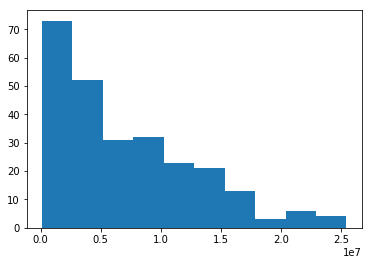

EFG_PCT


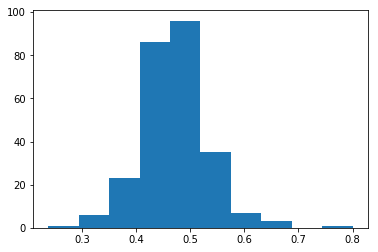

FG2_PCT


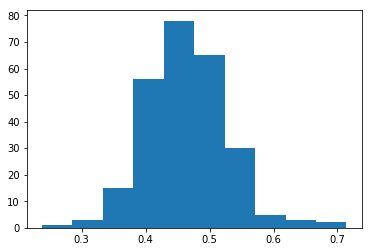

FG3_PCT


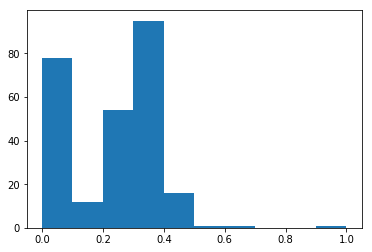

FG_PCT


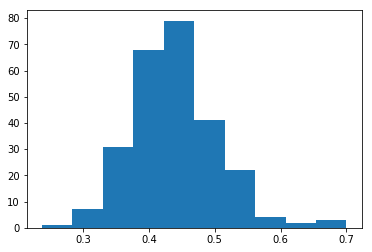

FT_PCT


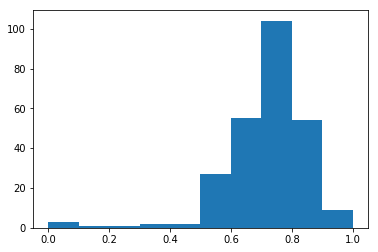

AST


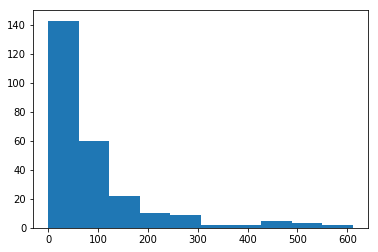

BLK


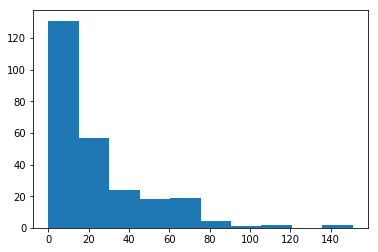

DRB


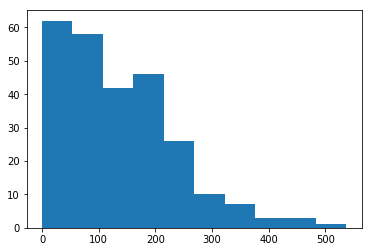

FG


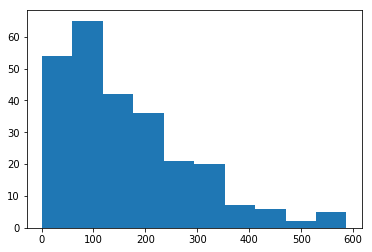

FG2


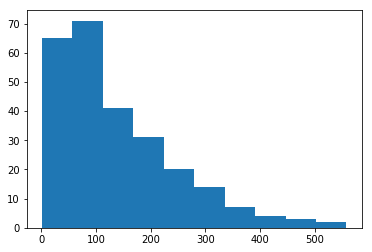

FG2A


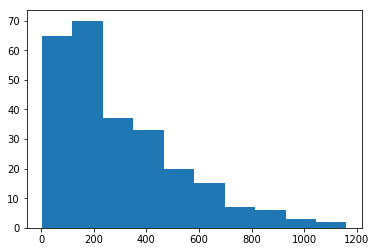

FG3


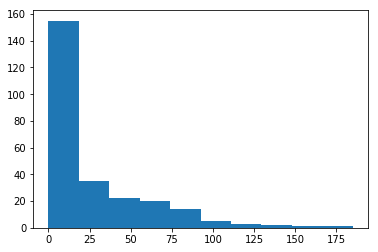

FG3A


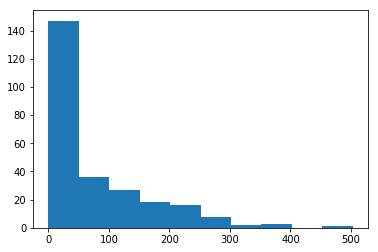

FGA


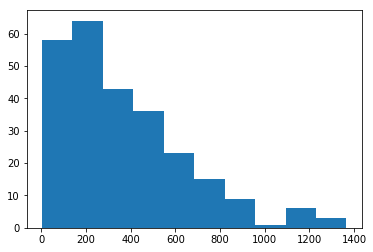

FT


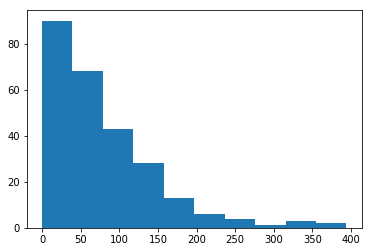

FTA


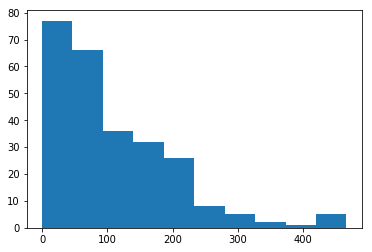

G


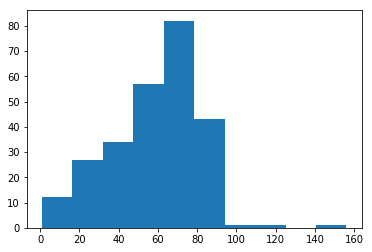

GS


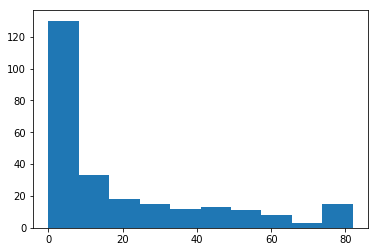

MP


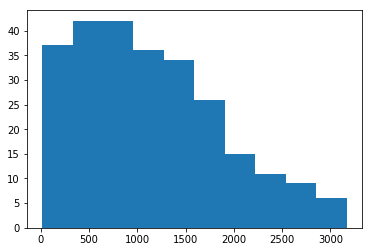

ORB


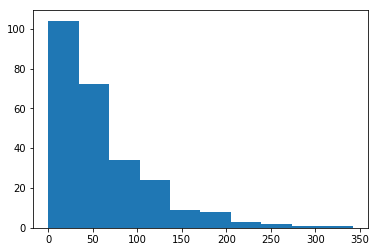

PF


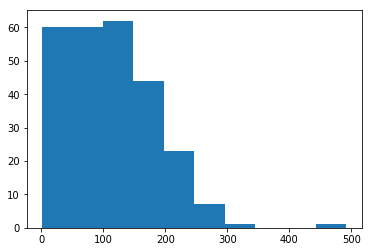

PTS


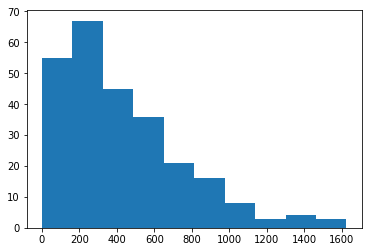

STL


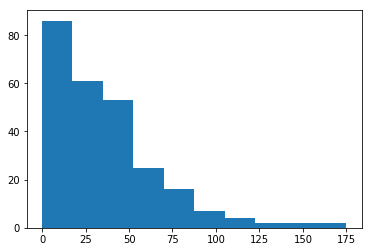

TOV


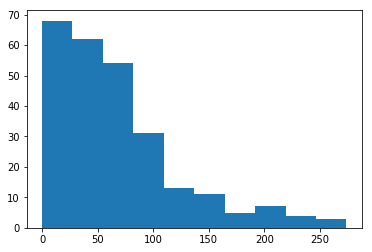

TRB


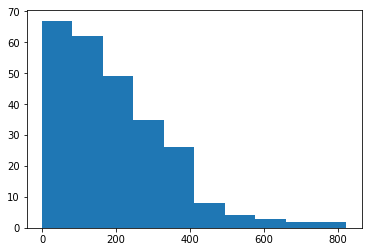

DWS


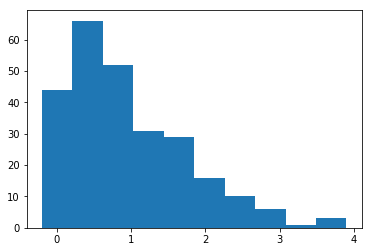

WS


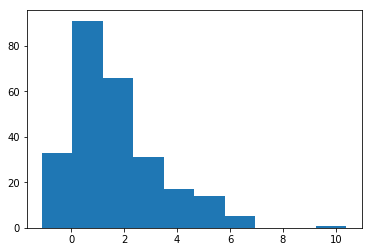

OWS


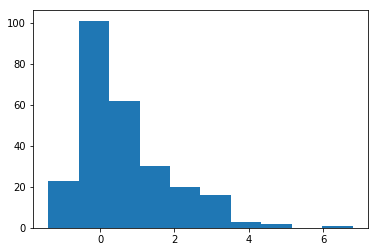

PER


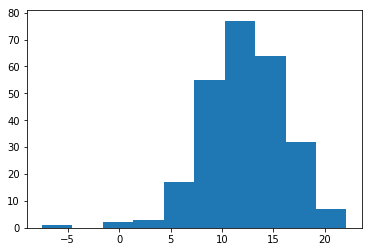

BLK_PCT


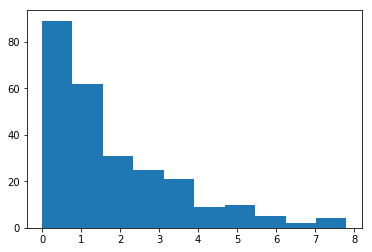

VORP


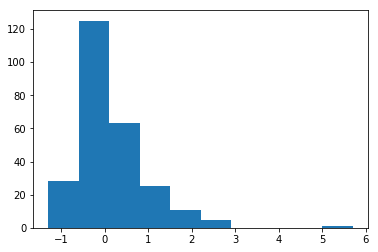

TRB_PCT


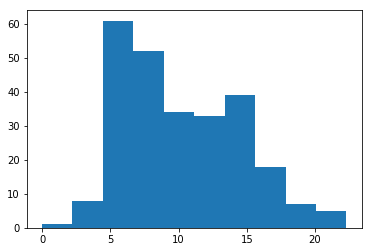

FG3A_PER_FGA_PCT


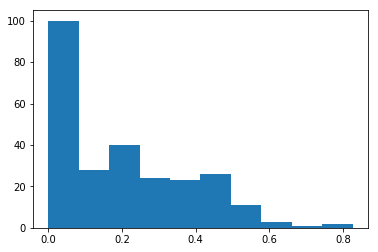

OBPM


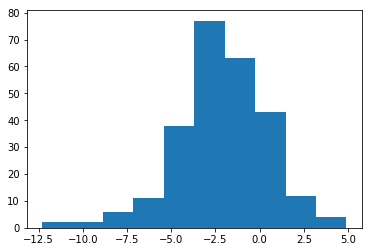

WS_PER_48


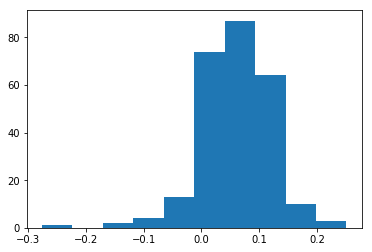

BPM


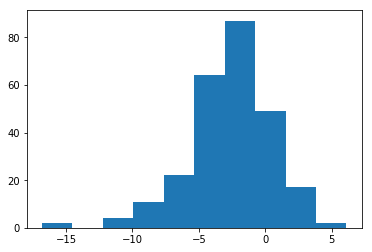

DRB_PCT


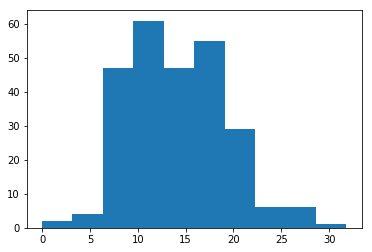

STL_PCT


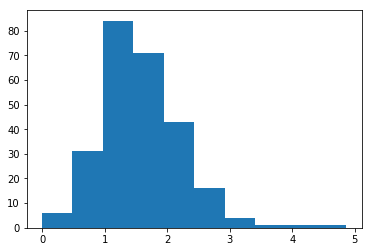

TOV_PCT


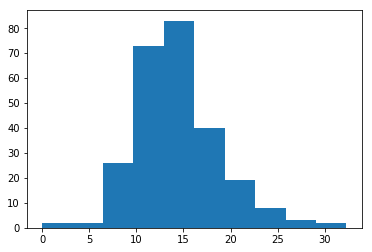

TS_PCT


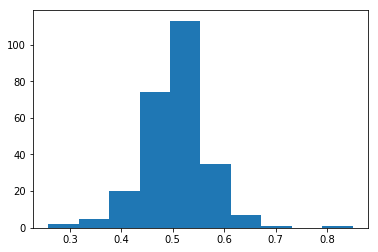

USG_PCT


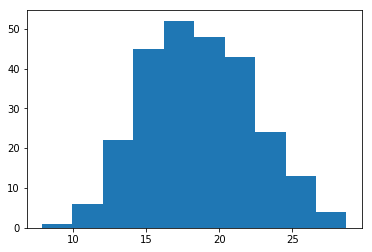

DBPM


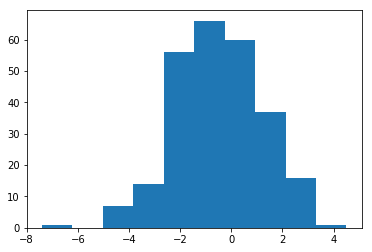

FTA_PER_FGA_PCT


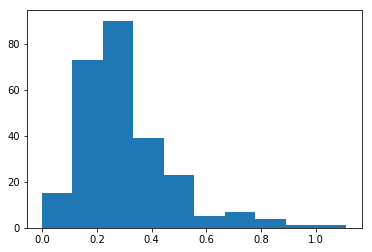

AST_PCT


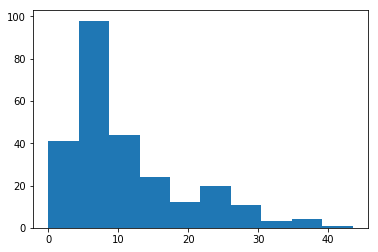

ORB_PCT


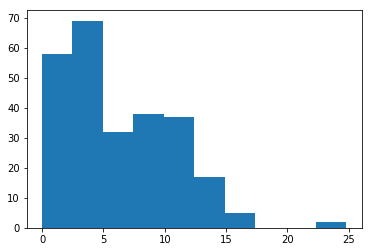

ROUND_2


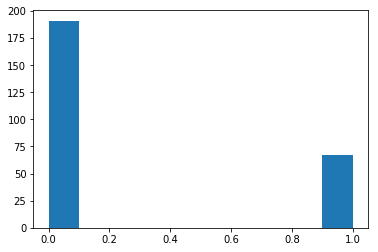

In [197]:
for column in numerical.columns:
    print(column)
    plt.hist(numerical[column])
    plt.show()

In [206]:
numerical.head()

,SALARY,EFG_PCT,FG2_PCT,FG3_PCT,FG_PCT,FT_PCT,AST,BLK,DRB,FG,...,DRB_PCT,STL_PCT,TOV_PCT,TS_PCT,USG_PCT,DBPM,FTA_PER_FGA_PCT,AST_PCT,ORB_PCT,ROUND_2
0,2016692,0.493,0.491,0.330,0.413,0.857,87,5,43,93,...,7.9,1.1,15.1,0.535,21.8,-1.8,0.218,23.5,2.5,0
1,21590909,0.478,0.500,0.271,0.447,0.721,33,22,123,93,...,17.8,1.3,13.9,0.517,15.5,0.0,0.293,6.3,6.4,0
2,2500000,0.505,0.507,0.000,0.505,0.566,41,16,98,103,...,18.7,1.8,18.7,0.529,22.0,0.4,0.485,11.4,12.5,1
3,633253,0.416,0.433,0.206,0.401,0.792,113,0,45,95,...,6.0,1.8,17.8,0.455,16.5,-2.6,0.203,20.4,1.6,0
4,12498483,0.499,0.502,0.000,0.499,0.731,124,76,537,333,...,24.5,1.2,15.3,0.539,16.0,1.1,0.317,7.9,11.4,0


In [339]:
numerical['SALARY_LOG'].head()

0    14.516969
1    16.887783
2    14.731801
3    13.358625
4    16.341118
Name: SALARY_LOG, dtype: float64

In [596]:
salary_log = numerical['SALARY_LOG']

numerical.drop(['SALARY_LOG', 'SALARY'], axis=1, inplace=True)

numerical.insert(0, 'SALARY_LOG', salary_log)

/Users/Stephen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [10]:
numerical

,SALARY,EFG_PCT,FG2_PCT,FG3_PCT,FG_PCT,FT_PCT,AST,BLK,DRB,FG,...,BPM,DRB_PCT,STL_PCT,TOV_PCT,TS_PCT,USG_PCT,DBPM,FTA_PER_FGA_PCT,AST_PCT,ORB_PCT
0,2016692,0.493,0.491,0.330,0.413,0.857,87,5,43,93,...,-1.8,7.9,1.1,15.1,0.535,21.8,-1.8,0.218,23.5,2.5
1,21590909,0.478,0.500,0.271,0.447,0.721,33,22,123,93,...,-2.8,17.8,1.3,13.9,0.517,15.5,0.0,0.293,6.3,6.4
2,2500000,0.505,0.507,0.000,0.505,0.566,41,16,98,103,...,-2.0,18.7,1.8,18.7,0.529,22.0,0.4,0.485,11.4,12.5
3,633253,0.416,0.433,0.206,0.401,0.792,113,0,45,95,...,-6.7,6.0,1.8,17.8,0.455,16.5,-2.6,0.203,20.4,1.6
4,12498483,0.499,0.502,0.000,0.499,0.731,124,76,537,333,...,-0.2,24.5,1.2,15.3,0.539,16.0,1.1,0.317,7.9,11.4
5,211084,0.454,0.447,0.331,0.429,0.743,98,43,260,374,...,-3.8,14.0,1.1,11.4,0.504,24.1,-1.3,0.331,8.4,5.2
6,981084,0.450,0.437,0.315,0.394,0.773,60,25,192,160,...,-3.0,15.4,2.1,18.3,0.499,17.3,0.1,0.293,6.4,6.1
7,1071720,0.386,0.389,0.250,0.364,0.833,0,1,4,8,...,-11.8,8.7,0.0,0.0,0.446,23.0,-7.4,0.273,0.0,10.2
8,9463484,0.450,0.442,0.333,0.429,0.727,55,5,75,153,...,-2.5,9.3,1.5,10.8,0.506,22.5,-2.2,0.401,9.5,6.9
9,4187599,0.423,0.423,0.000,0.423,0.645,4,18,60,33,...,-5.9,18.6,0.6,22.1,0.469,14.3,-0.2,0.397,1.6,12.1


In [11]:
X = numerical.iloc[:,1:]

y = numerical.iloc[:,0]

In [468]:
y.head()

0     2016692
1    21590909
2     2500000
3      633253
4    12498483
Name: SALARY, dtype: int64

In [512]:
X = big_five.iloc[:, 1:]
y = big_five.loc[:, ['SALARY']]

In [600]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2,random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=43)

In [569]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

In [570]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [602]:
lm = LinearRegression()
lr = lm.fit(X_train,y_train)
lr.score(X_train,y_train)

0.4016310802029913

In [574]:
len(X_train_poly)

154

In [603]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    
    print(alpha, ridge_model.score(X_val_scaled, y_val))

0.001 0.11969939235299842
0.01 0.12457626374459951
0.1 0.12494077747798481
1 0.11878067215136932
10 0.11995337191032694
100 0.1525581104991498
500 0.15537207988343482
1000 0.1403890183448726


In [535]:
list(zip(X.columns, ridge_model.coef_))

[('EFG_PCT', -1383.9327154688458),
 ('FG2_PCT', -473.8000786284756),
 ('FG3_PCT', 79943.81631360047),
 ('FG_PCT', -1766.689766235681),
 ('FT_PCT', -82912.31661076954),
 ('AST', 37447.55446997801),
 ('BLK', 85989.46561628753),
 ('DRB', 92610.76078565851),
 ('FG', 89050.59225668448),
 ('FG2', 98140.68766146485),
 ('FG2A', 94395.24809900449),
 ('FG3', 16518.672181732698),
 ('FG3A', 27809.392139113985),
 ('FGA', 85696.12798833309),
 ('FT', 105334.23643142256),
 ('FTA', 113674.26807437855),
 ('G', -16544.288458409792),
 ('GS', 103285.521357525),
 ('MP', 70108.23534608092),
 ('ORB', 71085.83948233479),
 ('PF', 14974.090717083689),
 ('PTS', 90261.92133788712),
 ('STL', 57633.684377268975),
 ('TOV', 83447.91909166607),
 ('TRB', 88625.59274352343),
 ('DWS', 32128.63103995997),
 ('WS', 62846.88429719582),
 ('OWS', 63965.59682196529),
 ('PER', 66109.44043599561),
 ('BLK_PCT', 12215.219813952544),
 ('VORP', 94780.06498732197),
 ('TRB_PCT', 32835.995707367176),
 ('FG3A_PER_FGA_PCT', 6441.6051525980

In [536]:
ridge_model.score(X_val_scaled, y_val)

0.1782546537502664

In [606]:
max_r2 = 0
max_alpha = 400000
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
for alpha in alphas:
    pipe = make_pipeline(PolynomialFeatures(degree=2),Lasso(alpha=alpha))
    pipe.fit(X_train_scaled, y_train)
    r2 = pipe.score(X_val_scaled, y_val)
    print(alpha, pipe.score(X_val_scaled, y_val))



/Users/Stephen/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.01 -0.2627905699309774
0.02 0.16198813196662654
0.03 0.15148165679834513
0.04 0.1498619640846125
0.05 0.20551985713548848
0.06 0.2345436572419859
0.07 0.23438473942275517
0.08 0.22291970559521523
0.09 0.21806451024959464
0.1 0.20420518565795387


In [607]:
lasso_model = Lasso(alpha=0.06)
lasso_model.fit(X_train_scaled, y_train)
print(lasso_model.score(X_val_scaled, y_val))
list(zip(numerical.columns, lasso_model.coef_))

0.14392935789227101


[('SALARY_LOG', -0.0),
 ('EFG_PCT', -0.0),
 ('FG2_PCT', 0.07847202449590213),
 ('FG3_PCT', -0.0),
 ('FG_PCT', -0.04874926078877507),
 ('FT_PCT', 0.0),
 ('AST', 0.0),
 ('BLK', 0.12057153558848172),
 ('DRB', 0.0),
 ('FG', 0.0),
 ('FG2', 0.0),
 ('FG2A', 0.0),
 ('FG3', 0.0),
 ('FG3A', 0.0),
 ('FGA', 0.0),
 ('FT', 0.0),
 ('FTA', 0.0),
 ('G', 0.05810298481836796),
 ('GS', 0.0),
 ('MP', 0.0),
 ('ORB', 0.0),
 ('PF', 0.0),
 ('PTS', 0.0),
 ('STL', 0.0),
 ('TOV', 0.017236595544176465),
 ('TRB', 0.0),
 ('DWS', 0.0),
 ('WS', 0.0),
 ('OWS', 0.0),
 ('PER', -0.0),
 ('BLK_PCT', 0.0501710398728055),
 ('VORP', -0.0),
 ('TRB_PCT', -0.0),
 ('FG3A_PER_FGA_PCT', 0.0),
 ('OBPM', -0.0),
 ('WS_PER_48', 0.058473236871183505),
 ('BPM', 0.0),
 ('DRB_PCT', 0.0),
 ('STL_PCT', 0.0),
 ('TOV_PCT', -0.0),
 ('TS_PCT', 0.13996789883017596),
 ('USG_PCT', 0.09745995586289352),
 ('DBPM', 0.0),
 ('FTA_PER_FGA_PCT', 0.0),
 ('AST_PCT', -0.0),
 ('ORB_PCT', -0.17744590038496777)]

In [609]:
new_df = numerical[['SALARY_LOG','FG2_PCT','FG_PCT','BLK','FT','G','TOV','BLK_PCT','WS_PER_48','TS_PCT','USG_PCT','ORB_PCT']]

In [612]:
lm = LinearRegression()


X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2,random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=43)

lm.fit(X_train, y_train)
lm.score(X_val, y_val)

0.16160662160506867

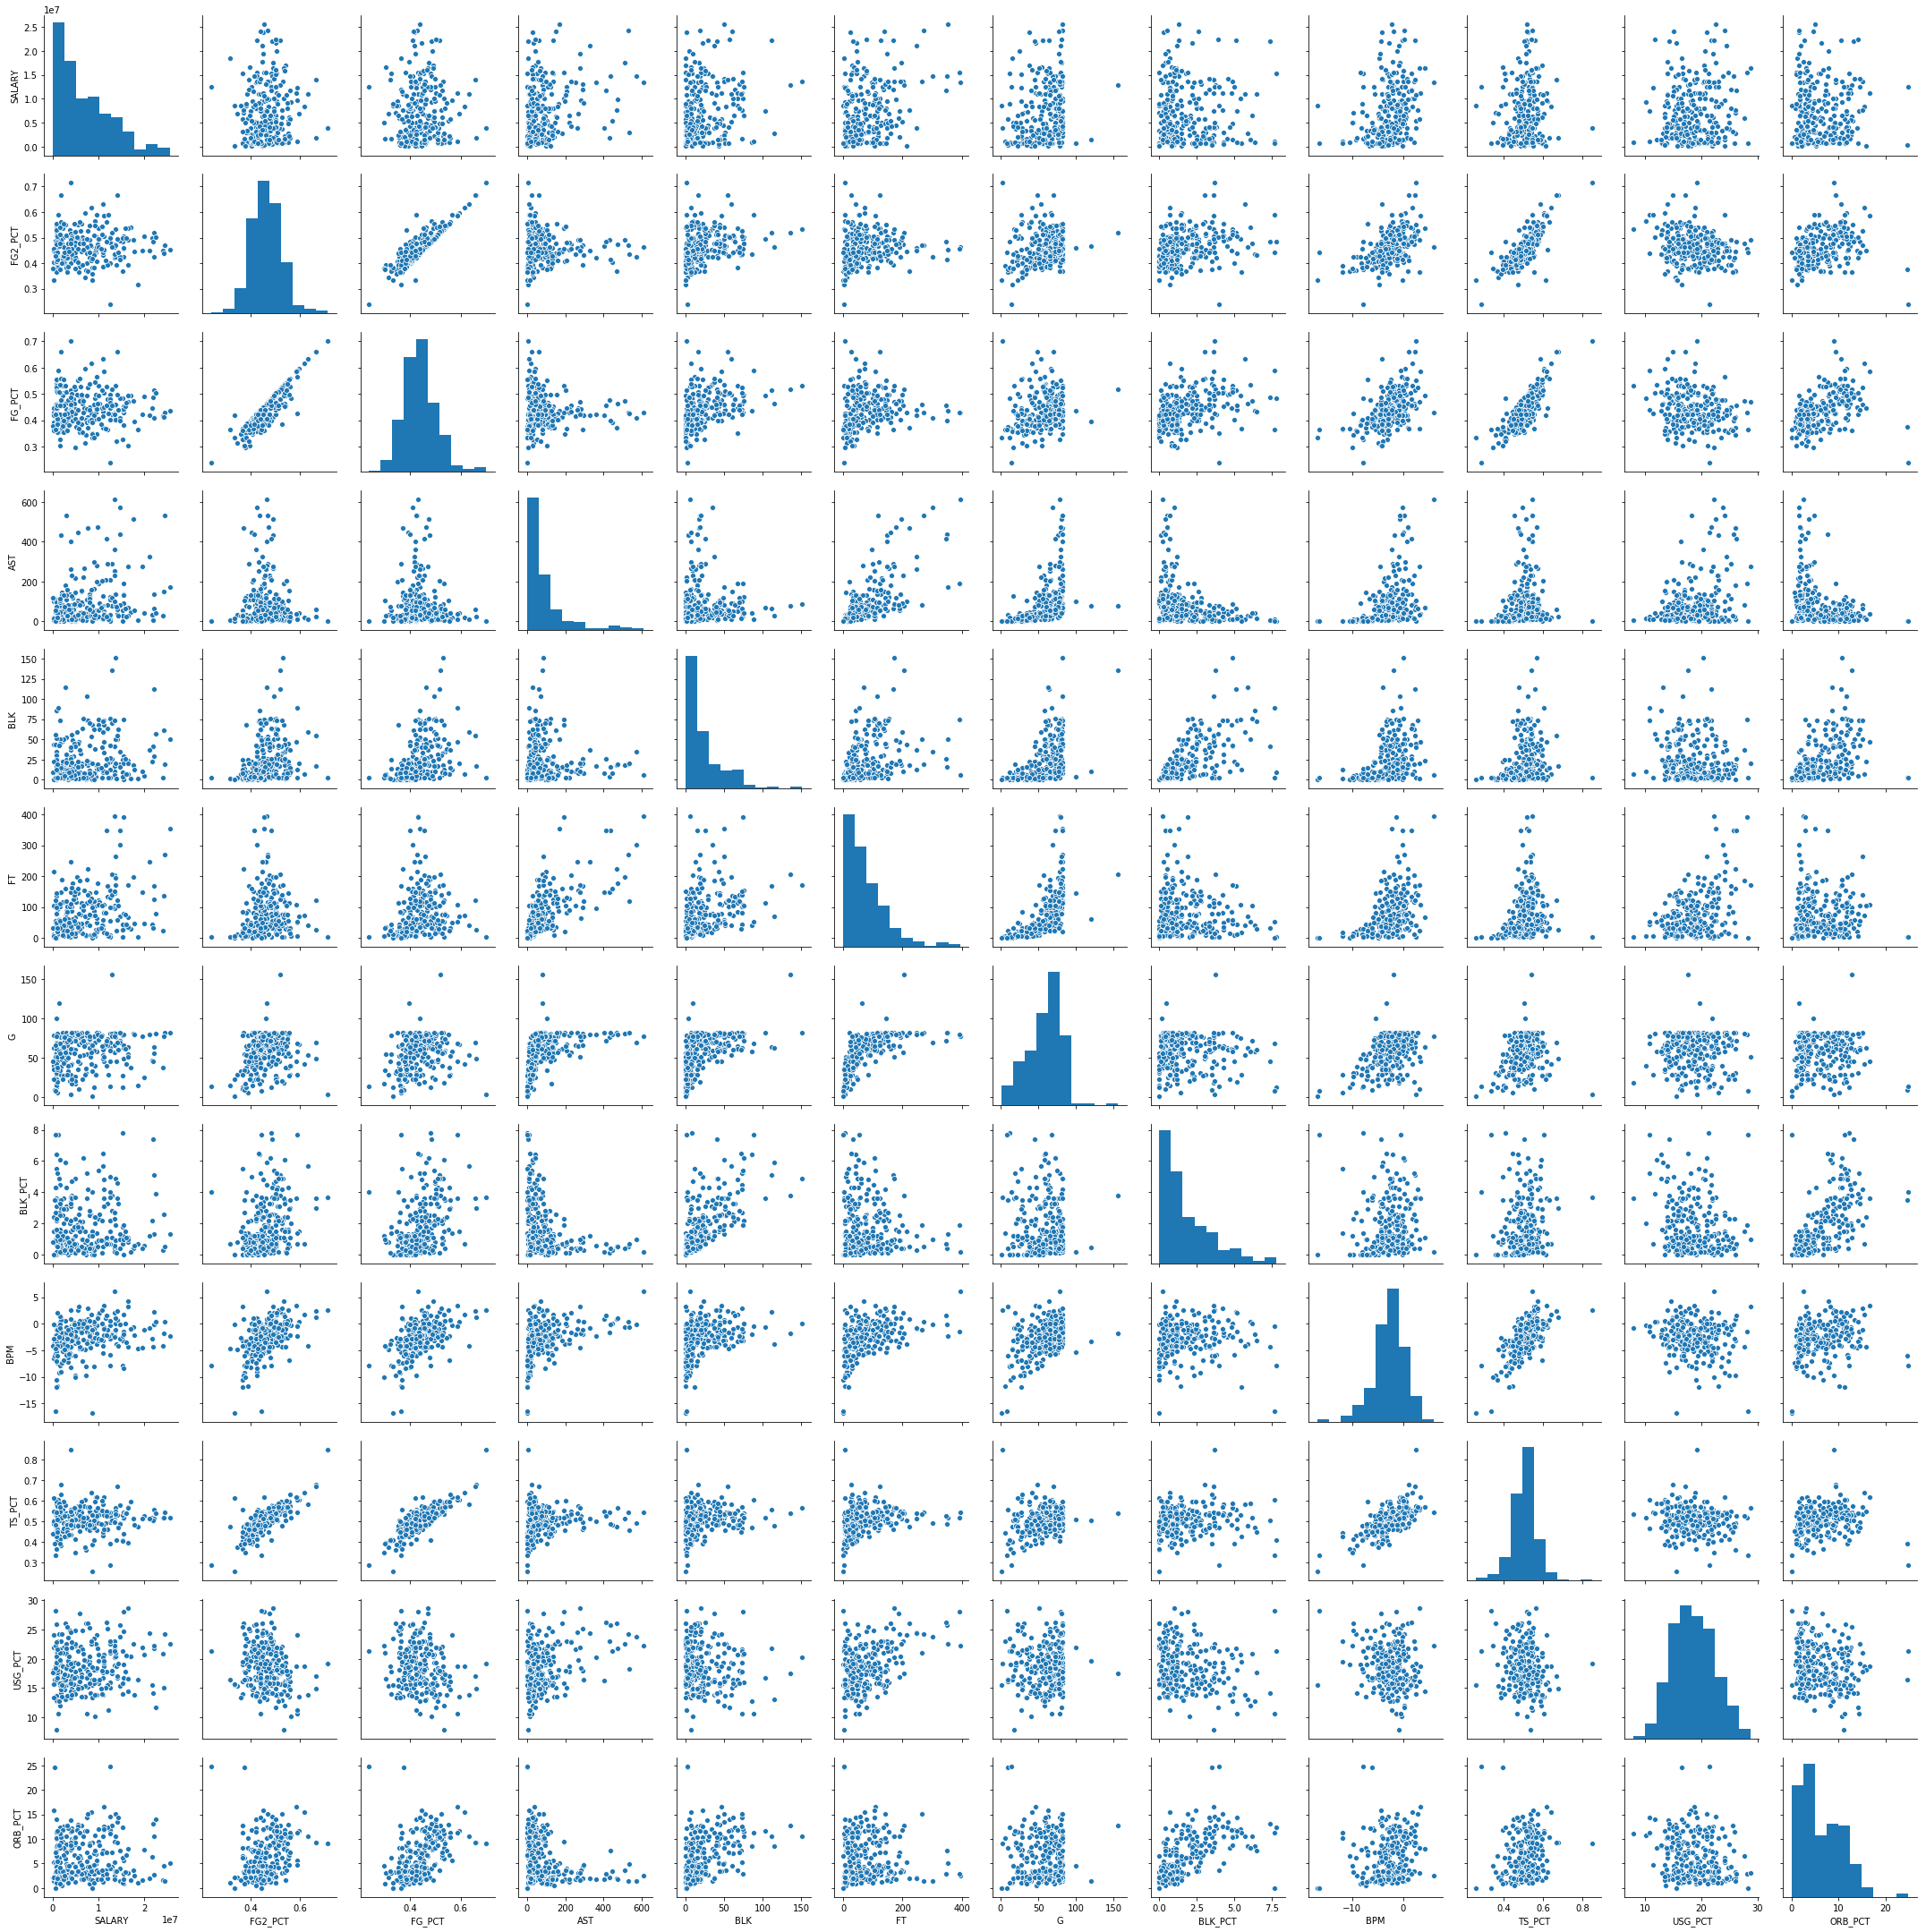

In [577]:
sns.pairplot(new_df)

[]

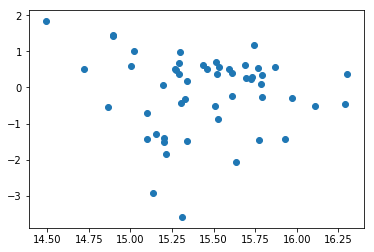

In [613]:
pred = lm.predict(X_test)
plt.scatter(pred, y_test - pred)
plt.plot()

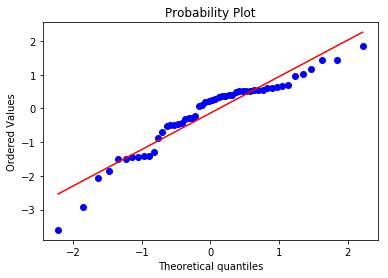

In [614]:
stats.probplot(y_test - pred, dist="norm",plot=plt);

In [545]:
poly = PolynomialFeatures(2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [565]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    
    print(alpha, ridge_model.score(X_val_scaled, y_val))

ridge_m = Ridge(alpha=10)

ridge_m.fit(X_train_scaled, y_train)
print(ridge_m.score(X_val_scaled, y_val))
list(zip(new_df.columns[1:], ridge_m.coef_))

0.001 0.16222456209282066
0.01 0.16226617291086298
0.1 0.16267693447239606
1 0.1663069662253205
10 0.18082487683580917
100 0.1748478549328013
1000 0.08133477110582878
0.18082487683580917


[('FG2_PCT', 240828.14543691563),
 ('FG_PCT', 426190.279071384),
 ('AST', -132464.83250868498),
 ('BLK', 1452823.6091589388),
 ('FT', 1424779.7108685859),
 ('G', -789745.7780147925),
 ('BLK_PCT', -341966.94941026),
 ('BPM', 1155270.903611108),
 ('TS_PCT', -1262836.421418278),
 ('USG_PCT', 728216.8191422804),
 ('ORB_PCT', -518435.13212158927)]

In [558]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    
    print(alpha, lasso_model.score(X_val_scaled, y_val))
    
lasso_m = Lasso(alpha=60000)

lasso_m.fit(X_train_scaled, y_train)
print(lasso_m.score(X_val_scaled, y_val))
list(zip(new_df.columns[1:], lasso_m.coef_))

0.001 0.1622199331532096
0.01 0.1622199381715743
0.1 0.16221998820819183
1 0.1622204868726832
10 0.16222546740910326
100 0.16227517762139032
1000 0.1627635778854074
10000 0.16747525167467203
100000 0.1803916966856931
1000000 0.11921659060454115
0.18541309464224065


[('FG2_PCT', 210530.671105273),
 ('FG_PCT', 258567.20350454148),
 ('AST', -0.0),
 ('BLK', 1486490.5803286356),
 ('FT', 1404183.6956085016),
 ('G', -822076.7072095608),
 ('BLK_PCT', -287919.1189644864),
 ('BPM', 1145429.395037655),
 ('TS_PCT', -1151266.78859397),
 ('USG_PCT', 695910.1054633023),
 ('ORB_PCT', -419975.52995654725)]

In [259]:
X_train.shape

(154, 14)

In [260]:
X_test.shape

(52, 14)

In [273]:
kf = KFold(n_splits =5, shuffle=True, random_state=42)

In [278]:
lm = LinearRegression()

np.mean(cross_val_score(lm, X, y, cv=5, scoring='r2'))



-0.029750637912157152

In [279]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2'))

-0.10521411550653985

In [264]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())


lm = Ridge(alpha=1)
lr = lm.fit(X_train, y_train)


In [265]:
lr.score(X_val, y_val)

0.08708518926106268

In [295]:
big_five = df[['SALARY','PTS','AST','TRB','STL','BLK']]

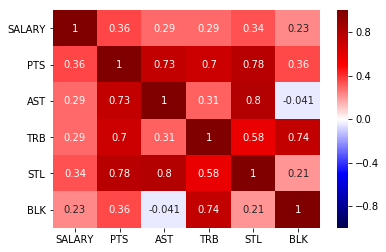

In [296]:
sns.heatmap(big_five.corr(), cmap='seismic', annot=True,vmin=-1, vmax=1)

In [139]:
df['ROUND_2'] = pd.get_dummies(df['ROUND'], drop_first=True)

In [143]:
lr = LinearRegression()

X = big_five.iloc[:, 1:]
y = big_five.loc[:, ['SALARY']]
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [144]:
lr.score(X,y)

0.15798816743097632

In [122]:
pred = lr.predict(X)

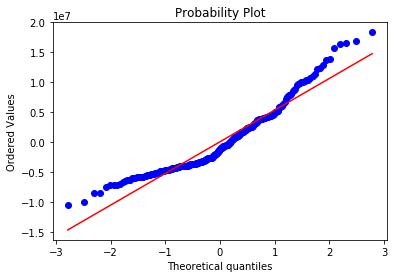

In [134]:
stats.probplot(df['SALARY'] - pred, dist='norm', plot=plt);

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

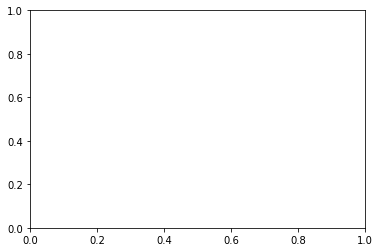

In [145]:
est = make_pipeline(PolynomialFeatures(2), LinearRegression())
est.fit(X,y)
